In [1]:
import torch
import torchvision
import torch.utils.data as Data
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import torch.optim as optim

In [2]:
X = np.eye(8,k=0,dtype = int)[::-1]
Label = np.mat([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

In [3]:
X

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
Label

matrix([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]])

In [5]:
train_input_tensor = torch.tensor(X.copy())
train_output_tensor = torch.tensor(X.copy())

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder  =  nn.Sequential(
            nn.Linear(8, 3),
            nn.Sigmoid(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 8),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded

In [7]:
Encoder = AutoEncoder()
print(Encoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=3, bias=True)
    (1): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=8, bias=True)
    (1): Sigmoid()
  )
)


In [8]:
EPOCH = 200
#BATCH_SIZE = 10
LR = 0.2

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Encoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

error = pd.DataFrame(columns=['epoch', 'error'])
    
# start training and illustrate the
for i in range(EPOCH):
    for j in range(8):
        epoch = i*8+j
        # input data to predict
        encoded, decoded = Encoder(train_input_tensor[j].float())
        # error between expected data and predicted data, pay attention on consequence
        # first is predicted, second is real value 
        loss = loss_func(decoded, train_output_tensor[j].float())
        # start optimization
        # set gradient as 0 before each optimization
        optimizer.zero_grad()
        
        # error pachpropogation
        loss.backward()
        
        # optimize parameters based on minimum loss
        optimizer.step()
        
        if epoch > 0:
            error = error.append(pd.DataFrame({'epoch':[epoch], 'error':[loss.data.numpy()]}))
        if epoch % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data)

Epoch:  0 | train loss: 0.2151
Epoch:  100 | train loss: 0.0652
Epoch:  200 | train loss: 0.0442
Epoch:  300 | train loss: 0.0166
Epoch:  400 | train loss: 0.0031
Epoch:  500 | train loss: 0.0073
Epoch:  600 | train loss: 0.0019
Epoch:  700 | train loss: 0.0039
Epoch:  800 | train loss: 0.0011
Epoch:  900 | train loss: 0.0022
Epoch:  1000 | train loss: 0.0007
Epoch:  1100 | train loss: 0.0013
Epoch:  1200 | train loss: 0.0005
Epoch:  1300 | train loss: 0.0009
Epoch:  1400 | train loss: 0.0003
Epoch:  1500 | train loss: 0.0007


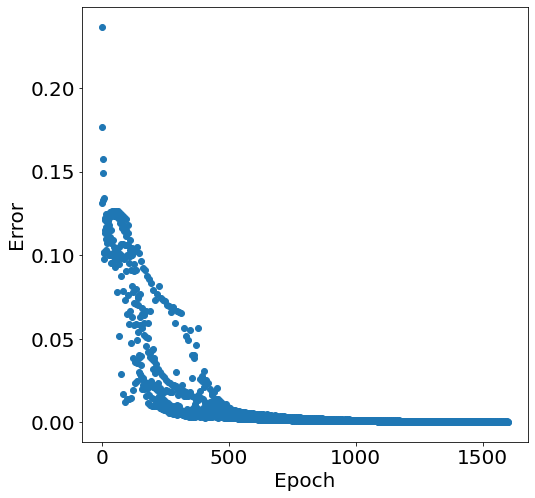

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel('Error', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
plt.tick_params(labelsize=20)
ax.scatter(error['epoch'],error['error'])

In [10]:
error

,epoch,error
0,1,0.23673736
0,2,0.13113594
0,3,0.1769236
0,4,0.15760115
0,5,0.14944285
...,...,...
0,1595,0.00034084352
0,1596,0.00060005864
0,1597,0.00049113453
0,1598,0.00028004393


In [11]:
encoded, decoded = Encoder(train_input_tensor.float())
decoded.detach().numpy()

array([[2.46016104e-02, 7.07490463e-03, 1.62643250e-08, 5.19603756e-14,
        6.85573416e-03, 2.80941893e-12, 2.39511537e-05, 9.64118838e-01],
       [1.81176700e-02, 4.21035975e-06, 1.69944521e-02, 2.41424553e-02,
        1.66374211e-05, 9.90809141e-08, 9.72891510e-01, 3.30959707e-02],
       [1.32912886e-03, 3.70580256e-02, 1.56964138e-02, 2.37062629e-02,
        4.26691025e-04, 9.55733657e-01, 9.62174272e-06, 1.71899810e-05],
       [5.45978673e-06, 3.10600288e-02, 2.16490999e-02, 3.24770647e-13,
        9.81154978e-01, 6.06481591e-03, 2.23225154e-08, 2.92988159e-02],
       [4.29058038e-02, 1.96783547e-03, 2.18692026e-03, 9.58590448e-01,
        1.68116730e-06, 3.04232929e-02, 1.46819726e-02, 5.43055721e-05],
       [6.32329975e-05, 3.99147757e-05, 9.60568786e-01, 8.94564437e-04,
        1.94512494e-02, 3.36522274e-02, 2.87209619e-02, 1.07699982e-03],
       [5.40621299e-03, 9.55701292e-01, 9.95565870e-08, 3.59016067e-10,
        6.80124434e-03, 1.13899158e-02, 1.90076496e-10, 1.

In [12]:
np.around(decoded.detach().numpy())

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
X

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

In [14]:
np.around(encoded.detach().numpy())

array([[1., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [0., 1., 1.]], dtype=float32)

In [15]:
Label

matrix([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]])

## The difference is still very large. This shows the features that are identified by encoder are not unique.